In [39]:
import sys
import OptimalTouring as Game
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import linear_sum_assignment
import time

x = Game.OptimalTouring("test.txt")

In [40]:
addresses = []
time_value = []
days = []

In [41]:
sites = x.getSites().copy()
efficiencies = []
for i in range(len(sites)):
    site = sites[i]
    addresses.append(site[:2])
    time_value.append(site[2:4])
    days.append(site[4])

    efficiency = site[3]/site[2]
    efficiencies.append(efficiency)

In [42]:
addresses = np.array(addresses)
time_value = np.array(time_value)
days = np.array(days)
efficiencies = np.array(efficiencies)

In [43]:
time_value.shape, days.shape

((200, 2), (200, 10, 2))

In [44]:
days[121]

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       [ 480,  960],
       [ 420, 1080],
       [ 480, 1380],
       [ 600, 1200],
       [ 600, 1320],
       [ 600, 1380],
       [   0,    0]])

In [45]:
order = np.flip(np.argsort(efficiencies))
order

array([171, 119,  33, 147, 194, 169,  78,  89,  92, 155,  62,  23, 134,
       153, 118, 145, 177,  50, 130,  40, 181,  77,  26,  20,  11, 163,
        31, 148, 108,  34, 199,  83, 137, 127,   6,  32, 162,  48,  51,
        87,  14, 102, 179, 173,  74,  60, 197,  46, 117, 112, 139, 135,
       109, 103,  45, 114,  58,  52,  79,  64, 191, 122,  17,  24,   4,
        42,   2, 190, 115, 101,   9,  97,  38, 116, 142,  94, 140,  69,
        39, 132, 104, 123,  70,  55, 107,  12, 141, 156,  22, 187, 165,
        66, 124,  68, 175, 166, 111,  93,  57, 188, 106, 154, 180,  95,
        36,  90, 160,  30,  99, 159, 126, 150, 195, 164, 152,  71,  59,
        91,  88, 110,  44,  75,  67, 157, 146,  81,  18,   3, 131,  86,
       193,  21, 136,  10,  35, 149,  85,  80,  98, 138,  96, 183, 184,
       176, 198, 128, 133,  63, 105,  53,  49,  43, 170,  29,  72,  19,
       168,  56,  15, 144,  76, 182, 100, 129,  28, 143,  16, 158, 189,
         5,  13, 121,  84, 192, 196, 113,   1, 185, 167,  61,  4

In [8]:
days[0]

array([[ 360,  780],
       [ 300, 1020],
       [ 240, 1200],
       [ 120,  960],
       [ 240, 1080],
       [ 240,  720],
       [ 480,  960],
       [   0,    0],
       [   0,    0],
       [   0,    0]])

## K-Means Clustering

In [46]:
k = x.getDay()

In [47]:
addresses[order[:k]]

array([[ 11,  25],
       [ 91, 123],
       [ 45, 130],
       [150, 134],
       [130,  11],
       [119,  12],
       [127,  38],
       [ 41,  61],
       [ 60, 196],
       [189,  23]])

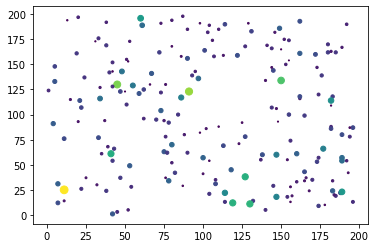

In [48]:
plt.scatter(addresses[:,0], addresses[:,1],s=efficiencies*10, c=efficiencies, cmap='viridis')
plt.show()

### Naive K-Means

In [11]:
# simple assignment of sites to centroids
centroids = addresses[order[:k]].astype(float)
assignments = np.zeros(len(addresses),dtype=int)-1

# assignments
for i in range(len(addresses)):
    distances = []
    for j in range(len(centroids)):
        distances.append(np.linalg.norm(addresses[i]-centroids[j],ord=1))
    assignments[i] = np.argmin(distances)


In [13]:
# naive shifting of centroids
centroids = addresses[order[:k]].astype(float)
assignments = np.zeros(len(addresses),dtype=int)-1
converged = False
count = 1
while not converged:
    converged = True
    # assignments
    for i in range(len(addresses)):
        distances = []
        for j in range(len(centroids)):
            distances.append(np.linalg.norm(addresses[i]-centroids[j],ord=1))
        if assignments[i] != np.argmin(distances):
            converged = False
            assignments[i] = np.argmin(distances)

    # centroids shifting
    for j in range(len(centroids)):
        centroids[j] = np.mean(addresses[assignments==j],axis=0)
    # print(count,centroids)
    count += 1

In [15]:
# incorporate time value as weights
centroids = addresses[order[:k]].astype(float)
assignments = np.zeros(len(addresses),dtype=int)-1
converged = False
count = 1
while not converged:
    converged = True
    # assignments
    for i in range(len(addresses)):
        distances = []
        for j in range(len(centroids)):
            distances.append(np.linalg.norm(addresses[i]-centroids[j],ord=1))
        if assignments[i] != np.argmin(distances):
            converged = False
            assignments[i] = np.argmin(distances)
        

    # centroids shifting
    for j in range(len(centroids)):
        centroids[j] = np.average(addresses[assignments==j],weights=efficiencies[assignments==j],axis=0)
    # print(count,centroids)
    count += 1

In [12]:
# total value per cluster in 3rd method
for i in range(k):
    print(np.sum(time_value[assignments==i,1]))

NameError: name 'assignments' is not defined

In [49]:
value_per_cluster = np.sum(time_value[:,1])/k
value_per_cluster

2237.3535879917886

In [50]:
# incorporate value balancing
centroids = addresses[order[:k]].astype(float)
assignments = np.zeros(len(addresses),dtype=int)-1
converged = False
count = 1
while not converged:
    converged = True
    value_acc = np.zeros(len(centroids))
    available_centroids = np.arange(len(centroids),dtype=int)
    # assignments
    for i in order:
        distances = np.zeros(len(centroids))+np.inf
        for j in available_centroids:
            distances[j] = np.linalg.norm(addresses[i]-centroids[j],ord=1)
        if assignments[i] != np.argmin(distances):
            converged = False
            assignments[i] = np.argmin(distances)
        value_acc[assignments[i]] += time_value[i][1]
        if value_acc[assignments[i]] > value_per_cluster:
            available_centroids = np.delete(available_centroids,np.argwhere(available_centroids==assignments[i]))
        
    # centroids shifting
    for j in range(len(centroids)):
        centroids[j] = np.average(addresses[assignments==j],weights=efficiencies[assignments==j],axis=0)
    # print(count,centroids)
    count += 1

In [51]:
# total value per cluster in 3rd method
for i in range(k):
    print(np.sum(time_value[assignments==i,1]))

1892.5994268728512
2247.685615366702
2249.232233745215
2252.0284427342185
2240.9786840127927
2257.3964377775887
2287.026352753657
2299.5447373111438
2342.5272902771476
2304.5166590665704


### Plots

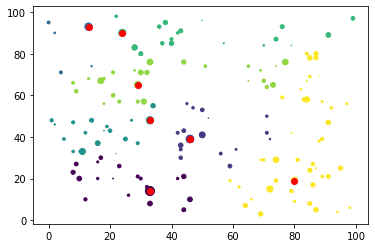

In [12]:
# clustering from simple assignment from initialization
plt.scatter(addresses[:,0], addresses[:,1],s=efficiencies*10, c=assignments, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1],c='red')
plt.show()

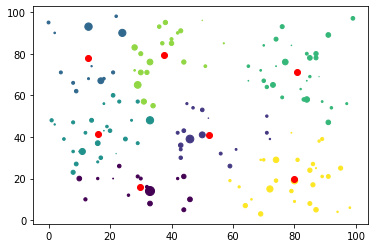

In [14]:
# clustering from naive k-means
plt.scatter(addresses[:,0], addresses[:,1],s=efficiencies*10, c=assignments, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1],c='red')
plt.show()

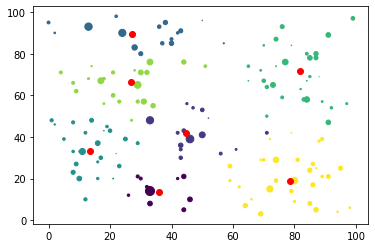

In [16]:
# clustering from k-means with value/time as weights
plt.scatter(addresses[:,0], addresses[:,1],s=efficiencies*10, c=assignments, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1],c='red')
plt.show()

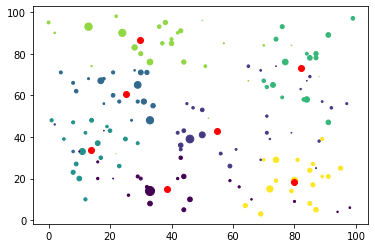

In [21]:
# weight balancing
plt.scatter(addresses[:,0], addresses[:,1],s=efficiencies*10, c=assignments, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1],c='red')
plt.show()

## Cluster-Day Assignment

In [52]:
cluster_orders = []
for i in range(k):
    cluster_orders.append(np.flip(np.argsort(efficiencies[assignments==i])))

In [53]:
# method to calcalate value of a cluster in a day, for cluster assignment to days
def day_cluster_value(day,cluster):
    # print(cluster_orders[cluster])
    open_hours = days[assignments==cluster][cluster_orders[cluster]][:,day,:]
    time_needed = time_value[assignments==cluster][cluster_orders[cluster]][:,0]
    schedule = np.zeros(1440)-1
    value = 0
    # print(open_hours,time_needed)
    
    # allocate places in cluster by iteratively checking, prioritize by efficiency
    for i in range(len(open_hours)):
        begin,end,leave = open_hours[i,0],open_hours[i,1],time_needed[i].astype(int)
        if (end-begin)*60>=leave:
            # leave = np.ceil(time/60).astype(int)
            # slide window to find available time slot
            while begin+leave<=end:
                if np.all(schedule[begin:begin+leave]==-1):
                    # print(i,begin,begin+leave)
                    schedule[begin:begin+leave] = cluster_orders[cluster][i]
                    value += time_value[assignments==cluster][cluster_orders[cluster][i],1]
                    break
                begin += 1
    # print(schedule[120:1200])
    return value

In [54]:
day_cluster_value(0,0)

596.7789579726391

In [55]:
day_cluster_values = np.zeros((k,k))
for i in range(k):
    for j in range(k):
        day_cluster_values[i,j] = day_cluster_value(i,j) # day i, cluster j
day_cluster_values

array([[ 596.77895797, 1003.02784786, 1291.24464695,  817.78184214,
         696.02775874,  878.23991997, 1279.57012938, 1167.68298148,
         812.45886315,  931.33799562],
       [ 492.46334401, 1063.44648901, 1006.55056532,  714.46987826,
         805.73843265, 1152.05404612, 1190.70544075, 1020.60819536,
         853.31778913, 1006.11667375],
       [ 585.12406509,  954.03292451, 1020.03881421, 1073.60496898,
         725.96857456,  846.07049531,  943.59634098,  900.35723769,
         921.58247912, 1136.14057134],
       [ 912.2265686 , 1026.2074374 , 1006.92082113, 1029.19397586,
         881.3752171 ,  797.52253414, 1241.26541304, 1123.79765081,
         746.49793472,  804.72230918],
       [ 769.74422904,  912.61091185,  740.68978507,  855.84865792,
         783.47538056,  721.4974062 , 1060.97101562, 1139.95154193,
         988.15006249, 1106.21244034],
       [ 685.05284665, 1268.89728094,  966.96909376,  980.37899282,
         861.25956745,  810.35982473, 1152.85604966,  861

In [56]:
row_ind, col_ind = linear_sum_assignment(day_cluster_values, maximize = True)

In [57]:
row_ind,col_ind

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2, 5, 3, 0, 7, 1, 4, 6, 9, 8]))

In [58]:
selected_elements = day_cluster_values[row_ind, col_ind]
selected_elements, selected_elements.sum()

(array([1291.24464695, 1152.05404612, 1073.60496898,  912.2265686 ,
        1139.95154193, 1268.89728094, 1088.27955476, 1268.33070185,
        1120.21628312, 1022.17350393]),
 11336.979097167841)

In [59]:
day_cluster_assignment = col_ind
day_cluster_assignment

array([2, 5, 3, 0, 7, 1, 4, 6, 9, 8])

In [60]:
assignments

array([3, 4, 9, 7, 2, 0, 7, 0, 3, 3, 7, 6, 1, 4, 8, 7, 3, 2, 8, 5, 7, 8,
       2, 6, 5, 0, 9, 3, 4, 8, 9, 4, 1, 2, 1, 9, 9, 3, 3, 7, 9, 3, 1, 5,
       8, 4, 9, 3, 7, 8, 2, 2, 9, 8, 0, 0, 3, 7, 3, 5, 5, 3, 3, 8, 2, 0,
       4, 6, 0, 1, 1, 8, 7, 3, 2, 4, 0, 1, 6, 9, 0, 9, 0, 6, 3, 1, 5, 1,
       1, 7, 9, 7, 8, 9, 6, 2, 8, 9, 8, 0, 3, 6, 4, 6, 3, 7, 4, 2, 5, 7,
       7, 5, 4, 3, 8, 8, 5, 7, 9, 1, 0, 0, 8, 7, 3, 0, 3, 5, 1, 4, 2, 7,
       2, 5, 4, 6, 4, 7, 3, 3, 7, 5, 0, 7, 3, 4, 5, 3, 0, 8, 5, 0, 4, 1,
       9, 9, 6, 8, 0, 2, 5, 0, 0, 6, 0, 6, 1, 0, 7, 6, 5, 0, 0, 5, 0, 1,
       4, 2, 3, 5, 1, 8, 4, 8, 5, 4, 0, 2, 2, 4, 3, 9, 4, 5, 6, 6, 4, 0,
       4, 9])

In [37]:
def cluster_for_day(day):
    return np.argwhere(assignments == day_cluster_assignment[day])

In [38]:
cluster_for_day(0).flatten()

array([  1,   4,   8,  10,  14,  15,  26,  32,  71,  72,  76,  81,  89,
        97, 118, 132, 141])

### Not Used

In [39]:
cluster_ratios = day_cluster_values/np.sum(day_cluster_values, axis=0, keepdims=True)
cluster_ratios

array([[0.14265465, 0.13640761, 0.13812155, 0.15052296, 0.13454853,
        0.13833393, 0.14343153],
       [0.14731194, 0.14360959, 0.15442442, 0.15131878, 0.14948793,
        0.11996076, 0.14006728],
       [0.1481219 , 0.15478878, 0.14020469, 0.11618918, 0.17044067,
        0.14636104, 0.14006728],
       [0.15288043, 0.13952488, 0.13486097, 0.15575261, 0.12496477,
        0.14359615, 0.13473373],
       [0.1405285 , 0.14092228, 0.14301241, 0.15575261, 0.14394438,
        0.14636104, 0.1465496 ],
       [0.1394148 , 0.13468774, 0.14129155, 0.12653479, 0.1586019 ,
        0.15358544, 0.14589316],
       [0.12908778, 0.15005912, 0.14808441, 0.14392906, 0.11801184,
        0.15180164, 0.14925741]])

In [40]:
day_cluster_assignment = np.zeros(k,dtype=int)-1
for i in range(k):
    mx,my = np.unravel_index(np.argmax(cluster_ratios, axis=None), cluster_ratios.shape)
    day_cluster_assignment[mx] = my
    cluster_ratios[mx] = 0
    cluster_ratios[:,my] = 0
    print(cluster_ratios)
    print()
print(day_cluster_assignment)

[[0.14265465 0.13640761 0.13812155 0.15052296 0.         0.13833393
  0.14343153]
 [0.14731194 0.14360959 0.15442442 0.15131878 0.         0.11996076
  0.14006728]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.15288043 0.13952488 0.13486097 0.15575261 0.         0.14359615
  0.13473373]
 [0.1405285  0.14092228 0.14301241 0.15575261 0.         0.14636104
  0.1465496 ]
 [0.1394148  0.13468774 0.14129155 0.12653479 0.         0.15358544
  0.14589316]
 [0.12908778 0.15005912 0.14808441 0.14392906 0.         0.15180164
  0.14925741]]

[[0.14265465 0.13640761 0.13812155 0.         0.         0.13833393
  0.14343153]
 [0.14731194 0.14360959 0.15442442 0.         0.         0.11996076
  0.14006728]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.1405285  0.14092228 0.14301241 0.         0.         0.14636104
  0.1465496 ]
 [0.1394148  0.13468774 0.14129155 0. 

In [44]:
day_cluster_values[np.arange(k),day_cluster_assignment],np.sum(day_cluster_values[np.arange(k),day_cluster_assignment])

(array([1409., 1705., 1814., 1370., 1786., 1722., 1396.]), 11202.0)

## Action

In [ ]:
i = 1
while x.getTime() < x.getDay()*1440:
    x.sendMove(siteId=i)
    x.sendMove(visitTime=240)
    i+=1



In [ ]:
x.settlement()